# 作業

實作模糊與邊緣檢測

- 透過 Gaussian Filter 實作模糊操作
- 透過 Sobel Filter 實作邊緣檢測

In [1]:
import cv2
import numpy as np
import IPython.display as display
from PIL import Image
from io import BytesIO

img = cv2.imread('images/lena.png')

In [2]:
def imshow(a, fmt='png'):
    if len(a.shape) == 3:
        a = a[:, :, ::-1]
    a = np.uint8(np.clip(a, 0, 255))
    c = BytesIO()
    Image.fromarray(a).save(c, fmt)
    display.display(display.Image(data=c.getvalue()))

## 邊緣檢測

### 比較 Sobel 如果在 uint8 的情況下做會 overflow 的狀況

Edge Detection


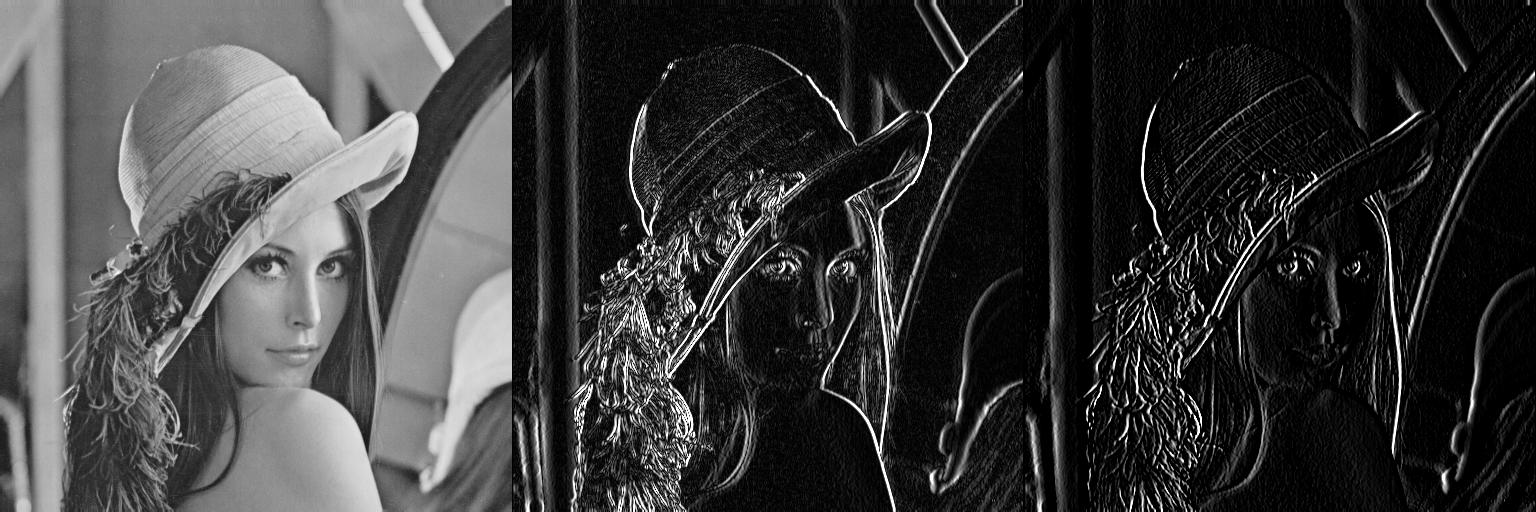

In [3]:
# 轉為灰階圖片
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 對 x 方向以包含負數的資料格式 (cv2.CV_16S) 進行 Sobel 邊緣檢測
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3)

# 對 x 方向依照比例縮放到所有數值都是非負整數
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 對 x 方向直接以非負整數的資料格式 (uint8) 進行 Sobel 邊緣檢測
img_sobel_x_uint8 = cv2.Sobel(img_grey, cv2.CV_8U, dx=1, dy=0, ksize=3)

#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_x_uint8))
# 比較 Sobel 邊緣檢測的過程中針對負數操作的不同產生的差異
print('Edge Detection')
imshow(img_show)

### 比較一次與兩次計算偏微分的結果

Edge Detection


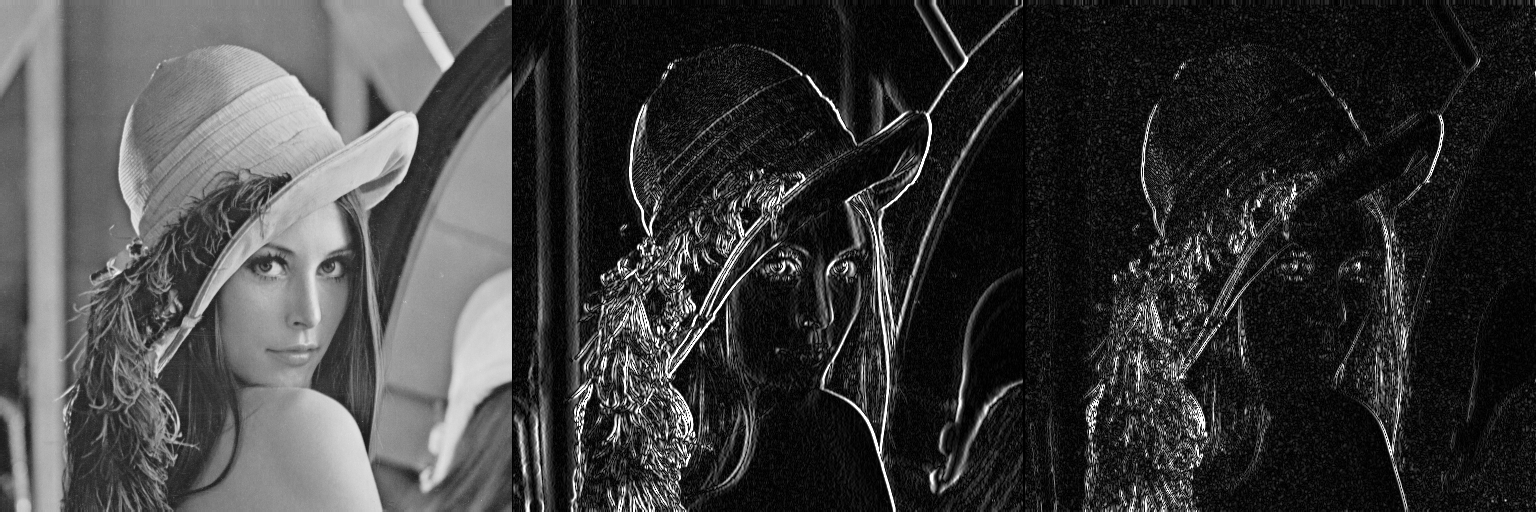

In [4]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 求一次導數取得邊緣檢測結果
img_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_x)

# 求二次導數取得邊緣檢測結果
img_xx = cv2.Sobel(img_grey, cv2.CV_16S, dx=2, dy=0, ksize=3)
img_sobel_xx = cv2.convertScaleAbs(img_xx)

#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_xx))
print('Edge Detection')
imshow(img_show)